 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [80]:
#Hello, I decided to do all the dataframes at once instead of seperately. Thank you!
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [81]:
# Reading whale returns

whale_returns_csv = pd.read_csv("Resources/whale_returns.csv", infer_datetime_format=True, parse_dates=True, index_col="Date")

In [ ]:
whale_returns_csv.drop_duplicates(inplace=True)
sp500_history_csv.drop_duplicates(inplace=True)
algo_returns_csv.drop_duplicates(inplace=True)

In [83]:
whale_returns_csv.dropna(inplace=True)
sp500_history_csv.dropna(inplace=True)
algo_returns_csv.dropna(inplace=True)

In [84]:
whale_returns_csv.isna().sum()
sp500_history_csv.isna().sum()
algo_returns_csv.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [85]:
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [86]:
sp500_history_csv['Close'] = sp500_history_csv['Close'].str.replace('$', '')
sp500_history_csv = sp500_history_csv.astype('float64')


In [87]:
sp500_history_csv = sp500_history_csv.pct_change()
sp500_history_csv.columns = ["S&P 500"]
sp500_history_csv.head()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [88]:
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [89]:
merged_df = pd.concat([whale_returns_csv, sp500_history_csv, algo_returns_csv], axis="columns", join="inner")
merged_df.dropna(inplace=True)
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


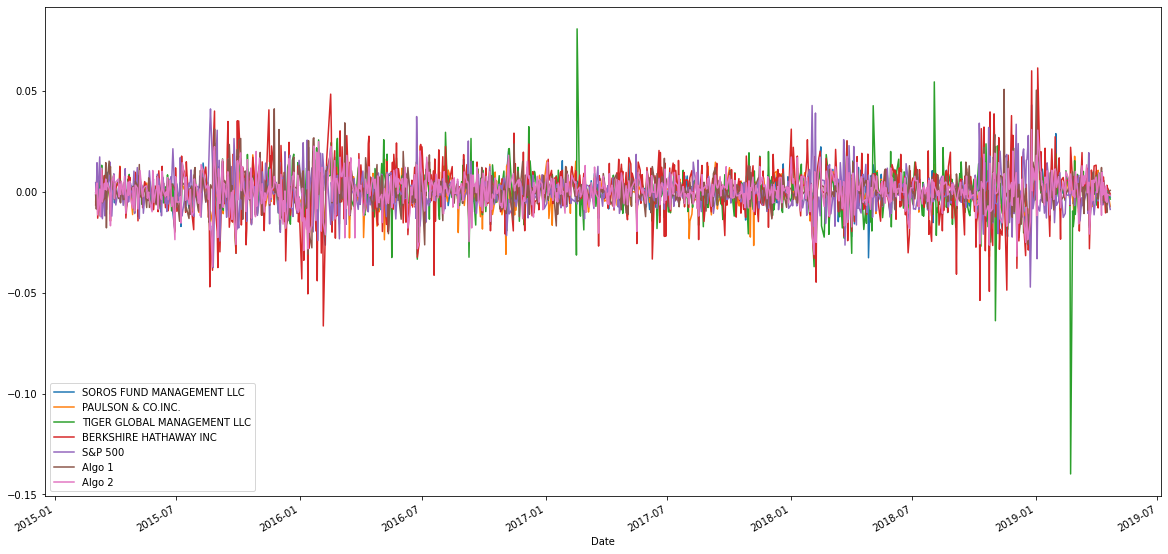

In [90]:
merged_df.plot(figsize=(20,10))

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

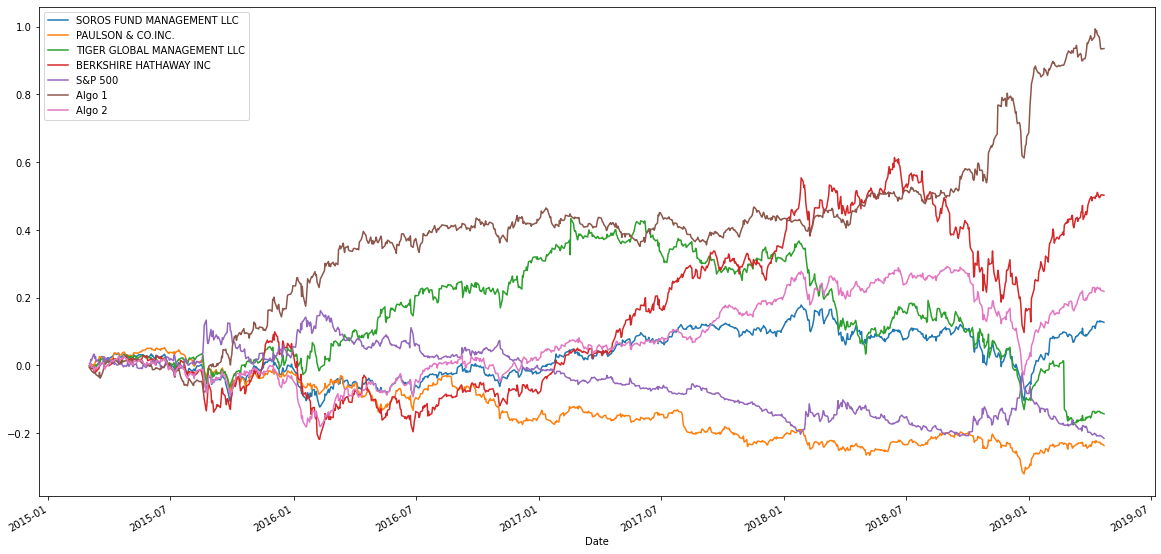

In [91]:
cumalative_returns = (1+merged_df).cumprod() -1
cumalative_returns.plot(figsize=(20,10))

In [92]:
# Count nulls
# YOUR CODE HERE

In [93]:
# Drop nulls
# YOUR CODE HERE

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [94]:
# Reading S&P 500 Closing Prices
# sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_csv = pd.read_csv("Resources/sp500_history.csv", infer_datetime_format=True, parse_dates=True, index_col="Date")

In [95]:
# Check Data Types
# YOUR CODE HERE

In [96]:
# Fix Data Types
# YOUR CODE HERE

In [97]:
# Calculate Daily Returns
# YOUR CODE HERE

In [98]:
# Drop nulls
# YOUR CODE HERE

In [99]:
# Rename Column
# YOUR CODE HERE

## Combine Whale, Algorithmic, and S&P 500 Returns

In [100]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

In [101]:
cum_returns_by_year = merged_df.groupby(merged_df.index.year).apply(lambda x: (1+x).cumprod() -1)
annual_returns_by_year = cum_returns_by_year.groupby(cum_returns_by_year.index.year).last()
annual_returns_by_year.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015,-0.008515,-0.023887,0.032805,0.041406,0.055534,0.234976,-0.043454
2016,-0.015672,-0.134745,0.270702,-0.120330,-0.060433,0.155770,0.061036
2017,0.135137,-0.071023,0.000037,0.469256,-0.144288,0.003699,0.176440
2018,-0.146344,-0.109899,-0.316543,-0.132727,0.079637,0.177718,-0.146046
2019,0.191705,0.092795,-0.044675,0.286969,-0.144097,0.147258,0.194935


In [102]:
top_returns = annual_returns_by_year.loc[2017].sort_values(ascending = False)
top_returns

BERKSHIRE HATHAWAY INC         0.469256
Algo 2                         0.176440
SOROS FUND MANAGEMENT LLC      0.135137
Algo 1                         0.003699
TIGER GLOBAL MANAGEMENT LLC    0.000037
PAULSON & CO.INC.             -0.071023
S&P 500                       -0.144288
Name: 2017, dtype: float64

In [103]:
annual_returns_by_month = cum_returns_by_year.groupby([cum_returns_by_year.index.year,cum_returns_by_year.index.month]).last()
annual_returns_by_month.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date Date                                                  
2015 3                      0.017207            0.011306   
     4                      0.017060            0.026298   
     5                      0.024838            0.050187   
     6                      0.002277            0.036534   
     7                     -0.012536            0.017572   

           TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  \
Date Date                                                                  
2015 3                        0.009419                0.002310  0.023348   
     4                        0.017710                0.006699 -0.000242   
     5                        0.021882                0.013688 -0.001103   
     6                       -0.000117                0.001476  0.015394   
     7                        0.020053               -0.020224  0.005414   

             Algo 1    Algo 2  
Date Date                      
2015 3     0.012788 -0.000962  
     4     0.004736  0.005358  
     5     0.003136  0.003782  
     6     0.007551 -0.006208  
     7    -0.044398 -0.022687

In [104]:
annual_returns_by_month.loc[2018,12].sort_values(ascending = False)

Algo 1                         0.177718
S&P 500                        0.079637
PAULSON & CO.INC.             -0.109899
BERKSHIRE HATHAWAY INC        -0.132727
Algo 2                        -0.146046
SOROS FUND MANAGEMENT LLC     -0.146344
TIGER GLOBAL MANAGEMENT LLC   -0.316543
Name: (2018, 12), dtype: float64

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

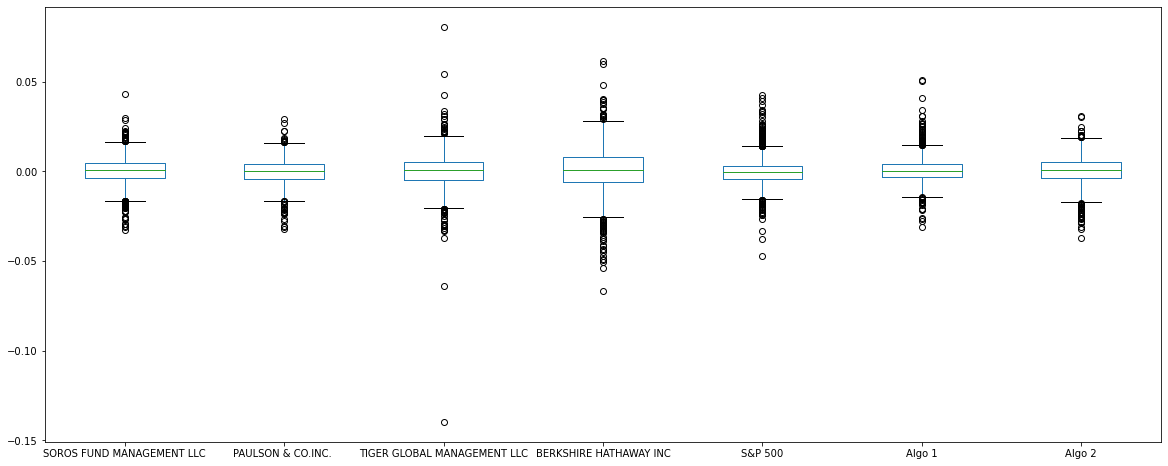

In [105]:
merged_df.plot.box(figsize=(20,8))

In [106]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = merged_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.008028
PAULSON & CO.INC.              0.007125
TIGER GLOBAL MANAGEMENT LLC    0.011084
BERKSHIRE HATHAWAY INC         0.013133
S&P 500                        0.008630
Algo 1                         0.007690
Algo 2                         0.008329
dtype: float64


In [107]:
# Determine which portfolios are riskier than the S&P 500
riskier = daily_std[daily_std > daily_std["S&P 500"]]
print(riskier) # Below Portfolios are Riskier because their std is GREATER than SP500

TIGER GLOBAL MANAGEMENT LLC    0.011084
BERKSHIRE HATHAWAY INC         0.013133
dtype: float64


In [108]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.127437
PAULSON & CO.INC.              0.113106
TIGER GLOBAL MANAGEMENT LLC    0.175955
BERKSHIRE HATHAWAY INC         0.208483
S&P 500                        0.136994
Algo 1                         0.122082
Algo 2                         0.132222
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

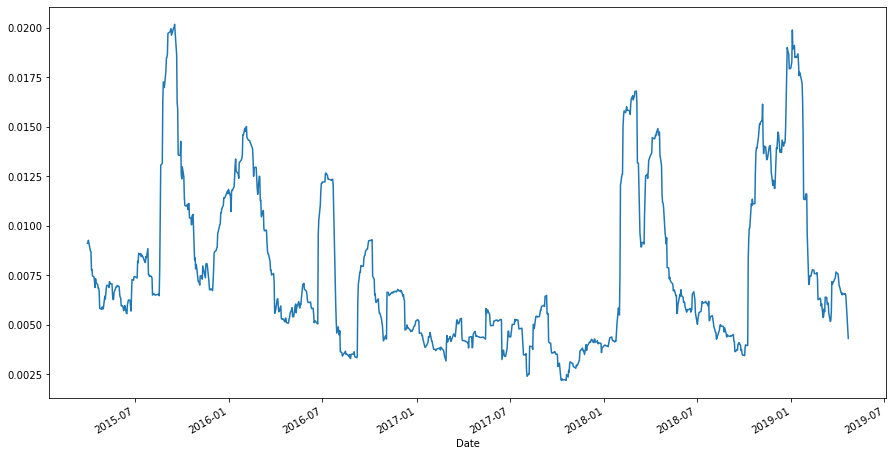

In [109]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
merged_df["S&P 500"].rolling(window=21).std().plot(figsize=(15,8))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.700223,0.561021,0.754494,-0.003805,0.325672,0.840949
PAULSON & CO.INC.,0.700223,1.000000,0.434485,0.546834,0.006020,0.275757,0.690693
TIGER GLOBAL MANAGEMENT LLC,0.561021,0.434485,1.000000,0.424032,-0.003281,0.166862,0.515815
BERKSHIRE HATHAWAY INC,0.754494,0.546834,0.424032,1.000000,-0.017800,0.295016,0.699210
S&P 500,-0.003805,0.006020,-0.003281,-0.017800,1.000000,-0.030977,-0.006564
Algo 1,0.325672,0.275757,0.166862,0.295016,-0.030977,1.000000,0.288933
Algo 2,0.840949,0.690693,0.515815,0.699210,-0.006564,0.288933,1.000000


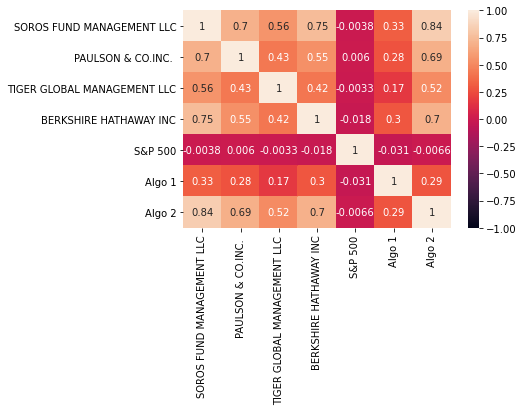

In [110]:
# Construct a correlation table
import seaborn as sns
correlation = merged_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

In [111]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = merged_df['BERKSHIRE HATHAWAY INC'].cov(merged_df['S&P 500'])
variance = merged_df['S&P 500'].var()
algo1_beta = covariance / variance
algo1_beta

-0.02708941356611226

In [112]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [113]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (merged_df.mean() * 252) / (merged_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.541854
S&P 500                       -0.376196
TIGER GLOBAL MANAGEMENT LLC   -0.130567
SOROS FUND MANAGEMENT LLC      0.298793
Algo 2                         0.440473
BERKSHIRE HATHAWAY INC         0.593620
Algo 1                         1.416286
dtype: float64

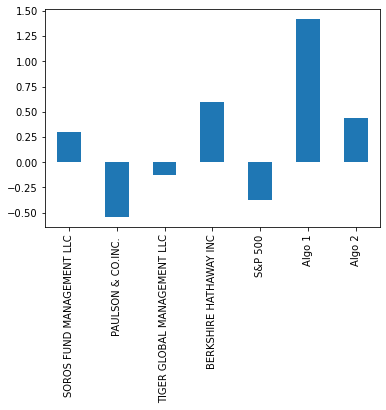

In [114]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [115]:
# Read the first stock
tickers = ['aapl','cost','goog']
combined_df = None
for ticker in tickers:
    TICKER = ticker.upper()
    ticker_returns_csv = Path(f"./Resources/{ticker}_historical.csv")
    ticker_df = pd.read_csv(ticker_returns_csv,index_col="Trade DATE", parse_dates=True)
    ticker_df.index.names = ["Date"]
    ticker_df.sort_index(inplace=True)
    ticker_df.drop(columns=['Symbol'],inplace=True)
    ticker_df.columns = [TICKER]
    ticker_df[TICKER] = ticker_df[TICKER].astype('float64').pct_change()
    combined_df = pd.concat([combined_df,ticker_df], axis="columns", join="inner")

print(combined_df.head())
print(combined_df.tail())

                AAPL      COST      GOOG
Date                                    
2018-05-11       NaN       NaN       NaN
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
                AAPL      COST      GOOG
Date                                    
2019-05-03  0.012431  0.007953  0.019602
2019-05-06 -0.015443 -0.001594  0.003366
2019-05-07 -0.026957 -0.016583 -0.012855
2019-05-08  0.000197  0.004830 -0.006669
2019-05-09 -0.010744  0.008826 -0.003335


In [116]:
# Read the second stock


In [117]:
# Read the third stock
# YOUR CODE HERE

In [118]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [119]:
# Reset the index
# YOUR CODE HERE

In [120]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [121]:
# Drop Nulls
combined_df.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [122]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_returns = combined_df.dot(weights)
weighted_returns.columns = ['Custom']
print(weighted_returns.columns)
print(weighted_returns.head())

['Custom']
Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [123]:
new_combined_df = pd.concat([merged_df,weighted_returns], axis="columns", join="inner")
#new_combined_df.rename(columns={0,"Custom"}, inplace=True)
columns = ["Soros Fund", "Paulson Co.", "Tiger Global", "Berkshire Hathaway", "S&P500", "Algo1", "Algo2", "CUSTOM"]
new_combined_df.columns = columns
new_combined_df.head()

,Soros Fund,Paulson Co.,Tiger Global,Berkshire Hathaway,S&P500,Algo1,Algo2,CUSTOM
Date,,,,,,,,
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.001135,-0.001139,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.000857,-0.002326,0.003341,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,0.002639,-0.006949,0.005205,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333,0.002557,-0.002496,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,0.003146,-0.003092,0.004924,0.007600


In [124]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_df.dropna(inplace=True)
print(new_combined_df.tail())

            Soros Fund  Paulson Co.  Tiger Global  Berkshire Hathaway  \
Date                                                                    
2019-04-15   -0.001422    -0.001156      0.000398           -0.010492   
2019-04-16    0.002699     0.000388     -0.000831            0.000837   
2019-04-17   -0.002897    -0.006467     -0.004409            0.003222   
2019-04-18    0.001448     0.001222      0.000582            0.001916   
2019-04-22   -0.002586    -0.007333     -0.003640           -0.001088   

              S&P500     Algo1     Algo2    CUSTOM  
Date                                                
2019-04-15 -0.000509 -0.004331 -0.004572  0.007522  
2019-04-16  0.002279 -0.006945  0.002899  0.000340  
2019-04-17 -0.001577 -0.010301 -0.005228  0.009292  
2019-04-18 -0.001011 -0.000588 -0.001229  0.001545  
2019-04-22 -0.008764  0.000677 -0.001936  0.001217  


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [125]:
# Risk
new_risk = new_combined_df.std()
print(new_risk.sort_values())

Paulson Co.           0.007461
Algo1                 0.008517
Algo2                 0.008845
Soros Fund            0.009366
S&P500                0.009683
CUSTOM                0.013462
Tiger Global          0.014861
Berkshire Hathaway    0.015778
dtype: float64


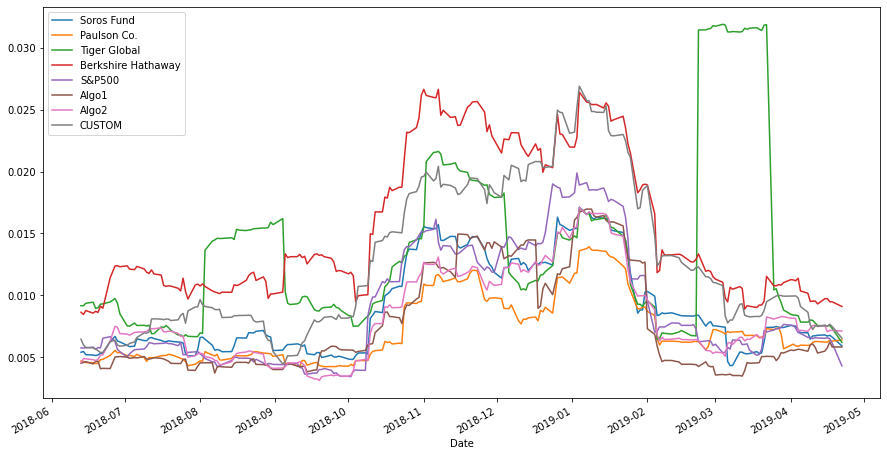

In [126]:
# Rolling
new_combined_df.rolling(window=21).std().plot(figsize=(15,8))

In [127]:
# Annualized Sharpe Ratios
whale_personal_combined_sharpe = (merged_df.mean()*252)/(merged_df.std()*np.sqrt(252))
whale_personal_combined_sharpe

SOROS FUND MANAGEMENT LLC      0.298793
PAULSON & CO.INC.             -0.541854
TIGER GLOBAL MANAGEMENT LLC   -0.130567
BERKSHIRE HATHAWAY INC         0.593620
S&P 500                       -0.376196
Algo 1                         1.416286
Algo 2                         0.440473
dtype: float64

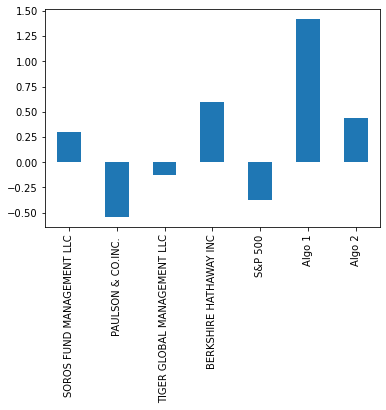

In [128]:
# Visualize the sharpe ratios as a bar plot
whale_personal_combined_sharpe.plot(kind="bar")

In [138]:
# Create a correlation analysis
corr = new_combined_df.corr()
corr

,Soros Fund,Paulson Co.,Tiger Global,Berkshire Hathaway,S&P500,Algo1,Algo2,CUSTOM
Soros Fund,1.000000,0.792452,0.478119,0.816106,-0.035788,0.337516,0.867219,0.735260
Paulson Co.,0.792452,1.000000,0.484919,0.650953,-0.063013,0.362188,0.789881,0.645907
Tiger Global,0.478119,0.484919,1.000000,0.324492,0.004891,0.114663,0.411056,0.392039
Berkshire Hathaway,0.816106,0.650953,0.324492,1.000000,-0.047863,0.326700,0.786132,0.803430
S&P500,-0.035788,-0.063013,0.004891,-0.047863,1.000000,-0.054487,-0.053702,0.005065
Algo1,0.337516,0.362188,0.114663,0.326700,-0.054487,1.000000,0.364122,0.260182
Algo2,0.867219,0.789881,0.411056,0.786132,-0.053702,0.364122,1.000000,0.739786
CUSTOM,0.735260,0.645907,0.392039,0.803430,0.005065,0.260182,0.739786,1.000000


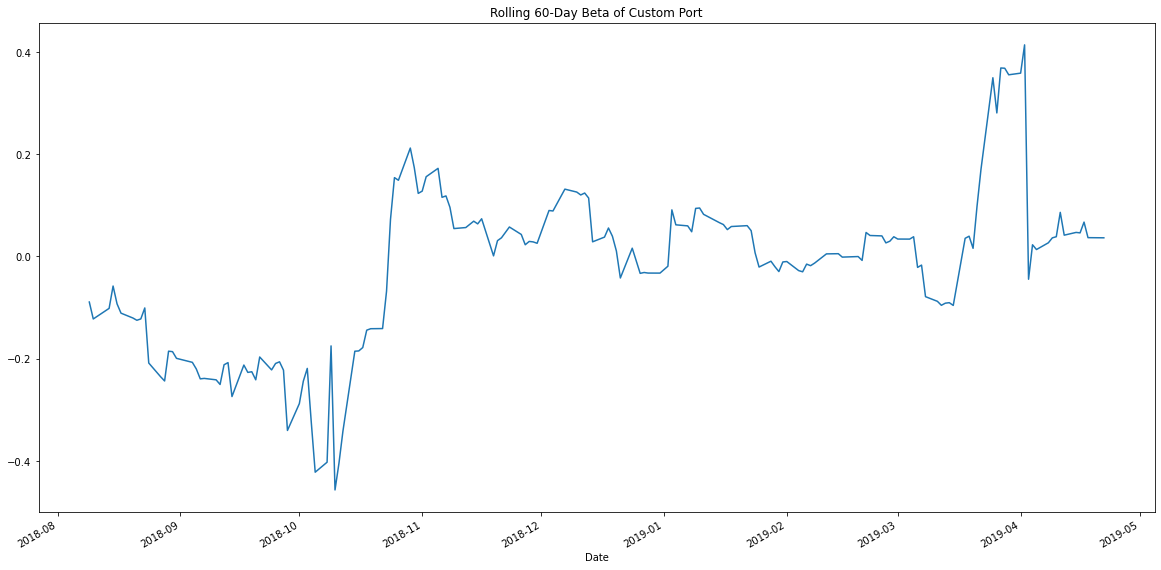

In [137]:
# Beta

rolling_covariance = new_combined_df["CUSTOM"].rolling(window=60).cov(new_combined_df["S&P500"])
rolling_variance = new_combined_df['S&P500'].rolling(window=60).var()
rolling_beta_custom = rolling_covariance / rolling_variance
rolling_beta_custom.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom Port')